In [ ]:
from sklearn import svm, datasets, neighbors,metrics
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('content/', force_remount = True)

# Read the CSV file
df_train = pd.read_csv('/content/content/MyDrive/Colab_Notebooks/train-new.csv')

df_test = pd.read_csv('/content/content/MyDrive/Colab_Notebooks/test-new.csv')

#EDA
# Display the first few rows of the dataset to get an initial overview
print(df_train.head())
print(df_test.head())


Mounted at content/
   dvcat   weight   dead  airbag seatbelt  frontal sex  ageOFocc  yearacc  \
0    55+   53.342   dead  airbag   belted        1   f        48     2002   
1  25-39  154.960  alive    none     none        1   m        26     2001   
2    55+   38.994  alive    none     none        1   f        51     2002   
3  25-39  168.568  alive  airbag   belted        1   m        27     1998   
4  10-24   27.751  alive  airbag   belted        0   m        26     2002   

   yearVeh     abcat occRole  deploy    caseid  injSeverity  
0     1997    deploy  driver       1  45:150:1            3  
1     1968   unavail  driver       0   76:40:1            3  
2     1994   unavail  driver       0  11:184:1            3  
3     1996    deploy    pass       1    9:17:1            3  
4     1997  nodeploy    pass       0     2:2:2            0  
   dvcat    weight   dead  airbag seatbelt  frontal sex  ageOFocc  yearacc  \
0  40-54    18.895  alive  airbag   belted        0   m        25  

In [ ]:
# Check the data types of columns
print(df_train.dtypes)



dvcat           object
weight         float64
dead            object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh          int64
abcat           object
occRole         object
deploy           int64
caseid          object
injSeverity      int64
dtype: object


In [ ]:
# Summary statistics
print(df_train.describe())


             weight       frontal      ageOFocc       yearacc       yearVeh  \
count  17565.000000  17565.000000  17565.000000  17565.000000  17565.000000   
mean     458.763017      0.643439     37.212411   1999.558497   1992.843894   
std     1471.148421      0.478997     17.945232      1.702162      5.568838   
min        0.000000      0.000000     16.000000   1997.000000   1953.000000   
25%       32.264000      0.000000     22.000000   1998.000000   1989.000000   
50%       86.986000      1.000000     33.000000   2000.000000   1994.000000   
75%      357.283000      1.000000     48.000000   2001.000000   1997.000000   
max    57871.595000      1.000000     97.000000   2002.000000   2003.000000   

             deploy   injSeverity  
count  17565.000000  17565.000000  
mean       0.340165      1.713066  
std        0.473778      1.290565  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      2.000000  
75%        1.000000      3.000000  


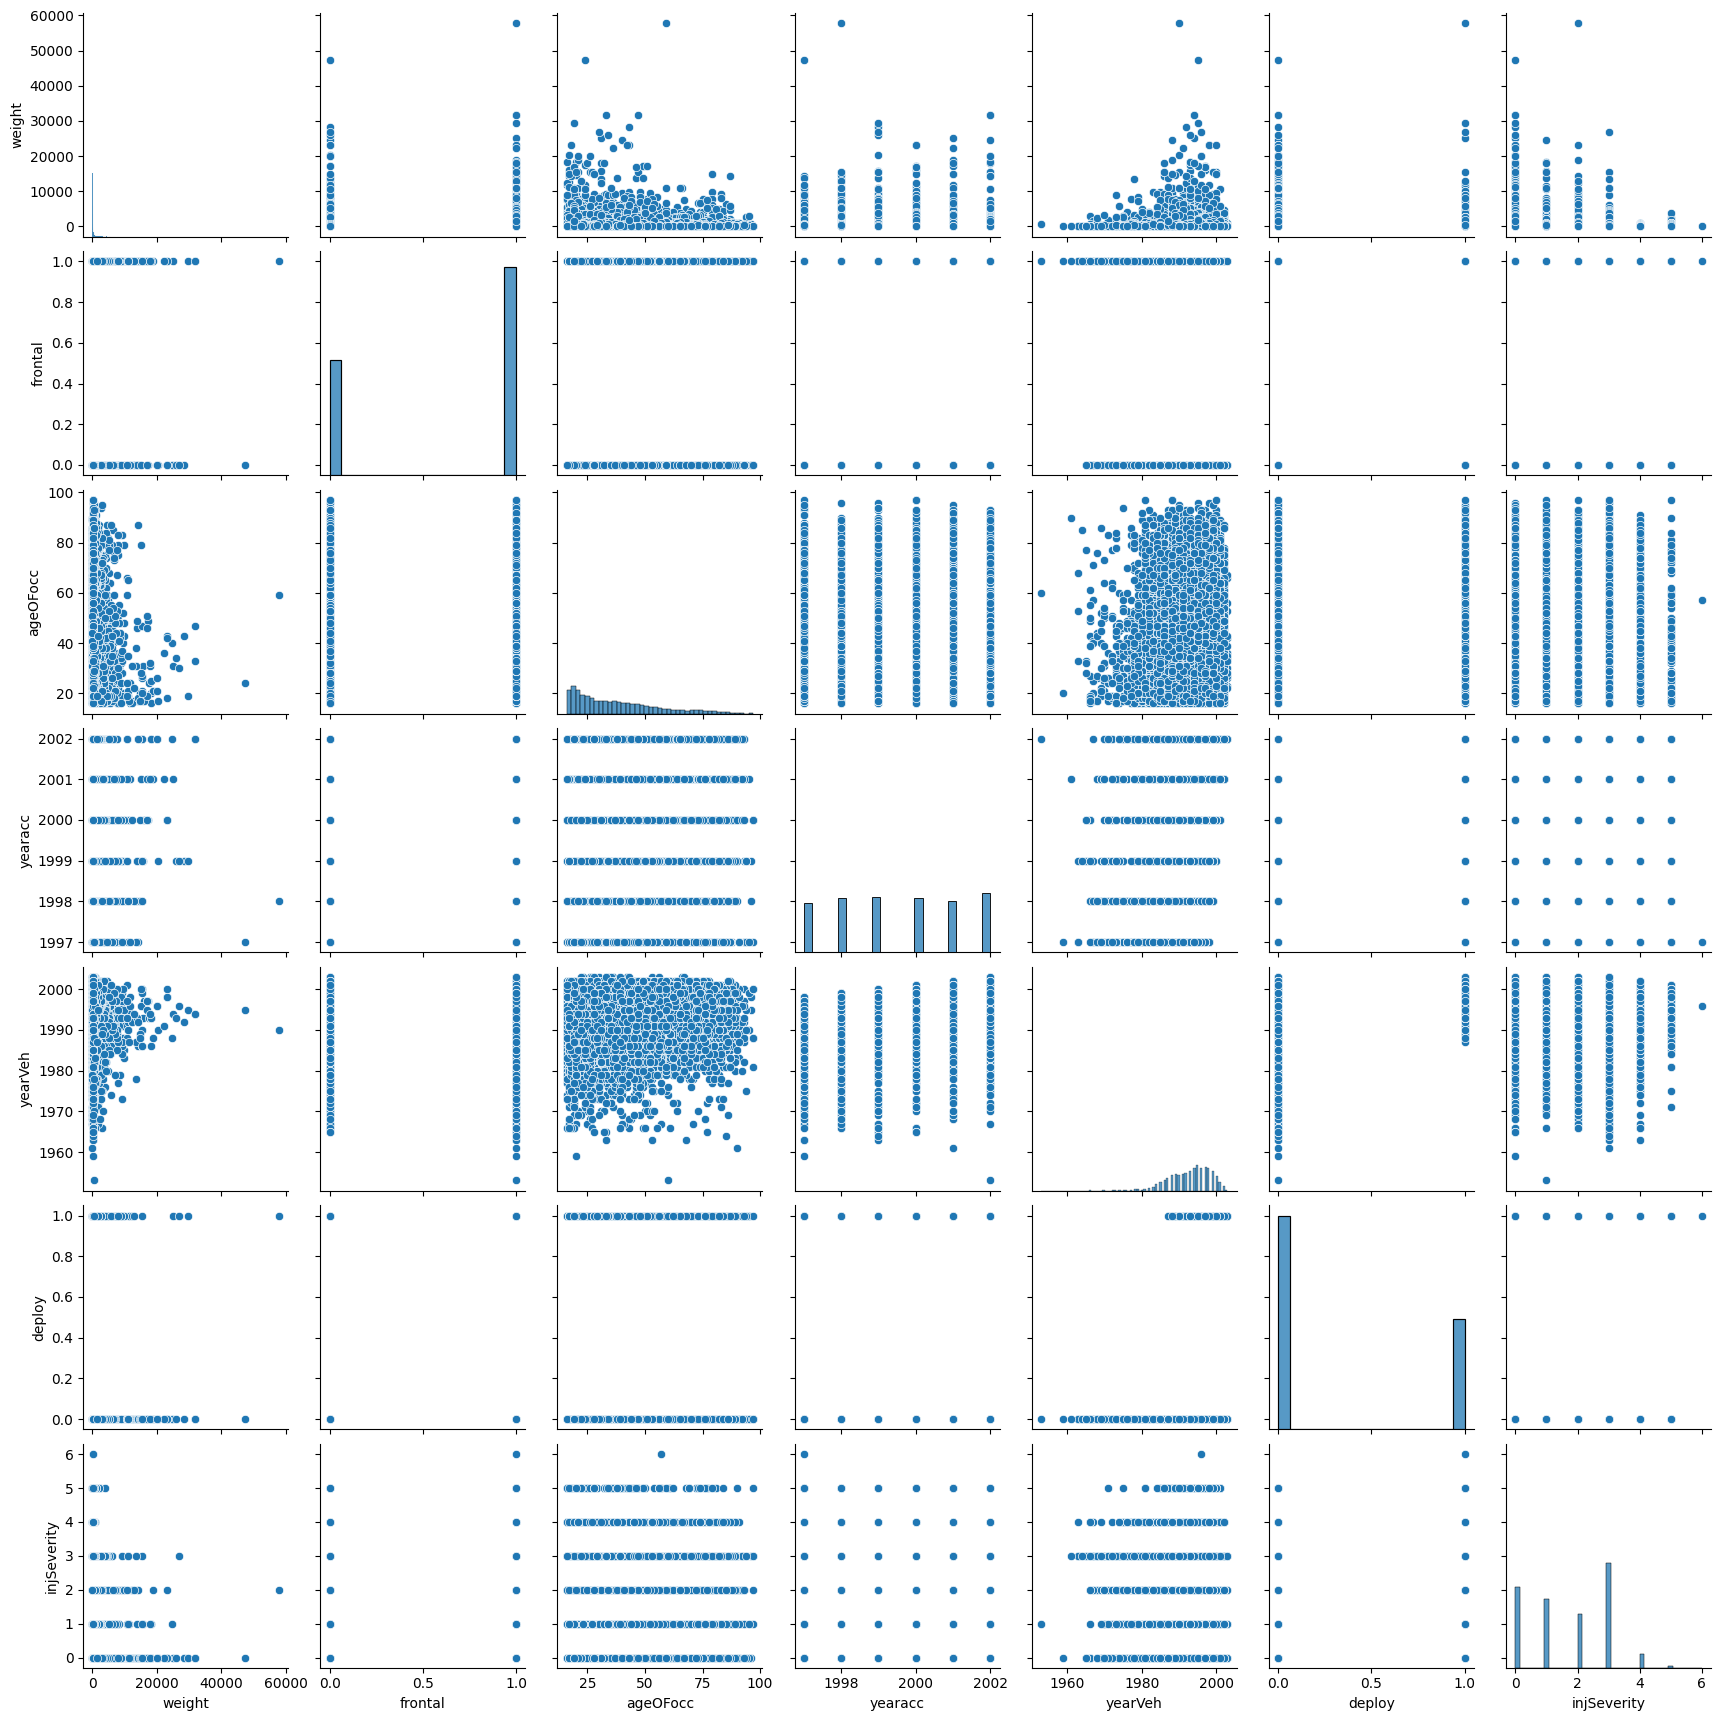

In [ ]:
# Data distribution of numerical features
sns.pairplot(df_train)
plt.show()



<ipython-input-87-f85a8908fc02>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


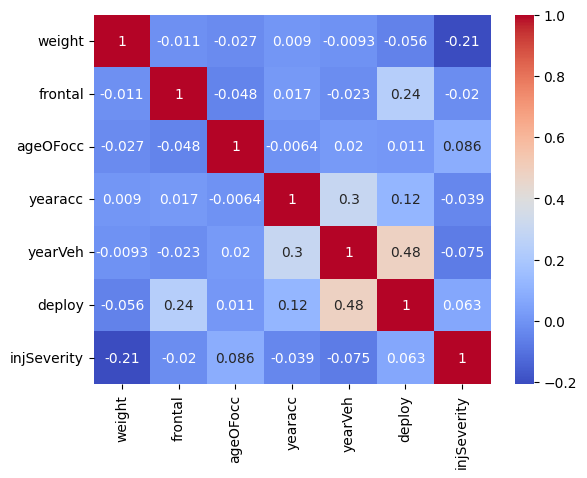

In [ ]:
# Correlation matrix
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



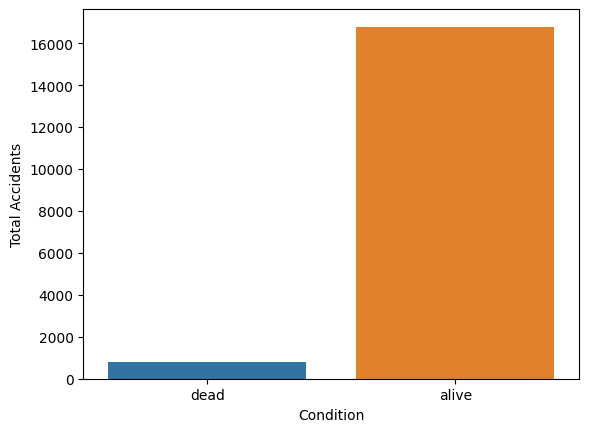

In [ ]:
# Count plot of categorical features

sns.countplot(data=df_train, x='dead')
plt.xlabel('Condition')
plt.ylabel('Total Accidents')
plt.show()




In [ ]:
# Handle missing values if any
print(df_train.isnull().sum())

dvcat          0
weight         0
dead           0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
caseid         0
injSeverity    0
dtype: int64


In [ ]:
#getting rid of none values in airbag
#get rid of none values in seatbelt
df_train['airbag'].replace('none', 'noairbag', inplace=True)
df_train['seatbelt'].replace('none', 'noseatbelt', inplace=True)
df_train['abcat'].replace('unavail', 'nodeploy', inplace=True)

#making strings into binary on binary value columns
df_train['dead'].replace({'dead': 0, 'alive': 1}, inplace=True)
df_train['airbag'].replace({'noairbag': 0, 'airbag': 1}, inplace=True)
df_train['seatbelt'].replace({'noseatbelt': 0, 'belted': 1}, inplace=True)
df_train['sex'].replace({'m': 0, 'f': 1}, inplace=True)
df_train['abcat'].replace({'nodeploy': 0, 'deploy': 1}, inplace=True)
df_train['occRole'].replace({'pass': 0, 'driver': 1}, inplace=True)

#do the same for test values
df_test['airbag'].replace('none', 'noairbag', inplace=True)
df_test['seatbelt'].replace('none', 'noseatbelt', inplace=True)
df_test['abcat'].replace('unavail', 'nodeploy', inplace=True)

#making strings into binary on binary value columns
df_test['dead'].replace({'dead': 0, 'alive': 1}, inplace=True)
df_test['airbag'].replace({'noairbag': 0, 'airbag': 1}, inplace=True)
df_test['seatbelt'].replace({'noseatbelt': 0, 'belted': 1}, inplace=True)
df_test['sex'].replace({'m': 0, 'f': 1}, inplace=True)
df_test['abcat'].replace({'nodeploy': 0, 'deploy': 1}, inplace=True)
df_test['occRole'].replace({'pass': 0, 'driver': 1}, inplace=True)

print(df_train.head())
print(df_test.head())

   dvcat   weight  dead  airbag  seatbelt  frontal  sex  ageOFocc  yearacc  \
0    55+   53.342     0       1         1        1    1        48     2002   
1  25-39  154.960     1       0         0        1    0        26     2001   
2    55+   38.994     1       0         0        1    1        51     2002   
3  25-39  168.568     1       1         1        1    0        27     1998   
4  10-24   27.751     1       1         1        0    0        26     2002   

   yearVeh  abcat  occRole  deploy    caseid  injSeverity  
0     1997      1        1       1  45:150:1            3  
1     1968      0        1       0   76:40:1            3  
2     1994      0        1       0  11:184:1            3  
3     1996      1        0       1    9:17:1            3  
4     1997      0        0       0     2:2:2            0  
   dvcat    weight  dead  airbag  seatbelt  frontal  sex  ageOFocc  yearacc  \
0  40-54    18.895     1       1         1        0    0        25     2002   
1  25-39   26

In [ ]:
#handle missing values


# Instantiate an imputer
imputer = SimpleImputer(strategy='median')




#target column selected as the dead column
target_column = 'dead'
target = df_train[target_column]
#separate the rest as data
data = df_train.drop(columns=[target_column,'dvcat','caseid','injSeverity'])

#separate the test data
target_column_test = 'dead'
target_test = df_test[target_column]

data_test = df_test.drop(columns=[target_column,'dvcat','caseid'])

# Fit and transform the imputer on your training data
data = imputer.fit_transform(data)

# Transform the imputer on your test data
data_test = imputer.transform(data_test)


In [ ]:
#knn prediction of wether accident resulted in a death
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(data,target)
prediction = knn.predict(data_test)
print(prediction)
print(target_test)
accuracy = metrics.accuracy_score(target_test, prediction)
accuracy = round(accuracy * 100, 4)
print("Accuracy KNN:", accuracy,'%')

[1 1 1 ... 1 1 1]
0       1
1       1
2       1
3       1
4       1
       ..
8647    1
8648    1
8649    1
8650    1
8651    0
Name: dead, Length: 8652, dtype: int64
Accuracy KNN: 95.3306 %


In [ ]:
#SVM predictions of wether accident resulted in a death
s=svm.SVC(kernel='linear')
s.fit(data,target)
decisions = s.predict(data_test)
print(decisions)
accuracy = metrics.accuracy_score(target_test, decisions)
accuracy = round(accuracy * 100, 4)
print("Accuracy SVM:", accuracy,'%')

[1 1 1 ... 1 1 1]
Accuracy SVM: 95.3421 %


In [ ]:
# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)
data_test = scaler.transform(data_test)

# Apply PCA
n_components = 6
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)
data_test_pca = pca.transform(data_test)


In [ ]:
# KNN prediction of wether accident resulted in a death on PCA-transformed data
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(data_pca, target)
prediction_knn = knn.predict(data_test_pca)
accuracy_knn = metrics.accuracy_score(target_test, prediction_knn)
accuracy_knn = round(accuracy_knn * 100, 4)
print("Accuracy KNN with PCA:", accuracy_knn, '%')

Accuracy KNN with PCA: 88.1184 %


In [ ]:
# SVM predictions of wether accident resulted in a death on PCA-transformed data
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(data_pca, target)
decisions_svm = svm_classifier.predict(data_test_pca)
accuracy_svm = metrics.accuracy_score(target_test, decisions_svm)
accuracy_svm = round(accuracy_svm * 100, 4)
print("Accuracy SVM with PCA:", accuracy_svm, '%')

Accuracy SVM with PCA: 95.3421 %


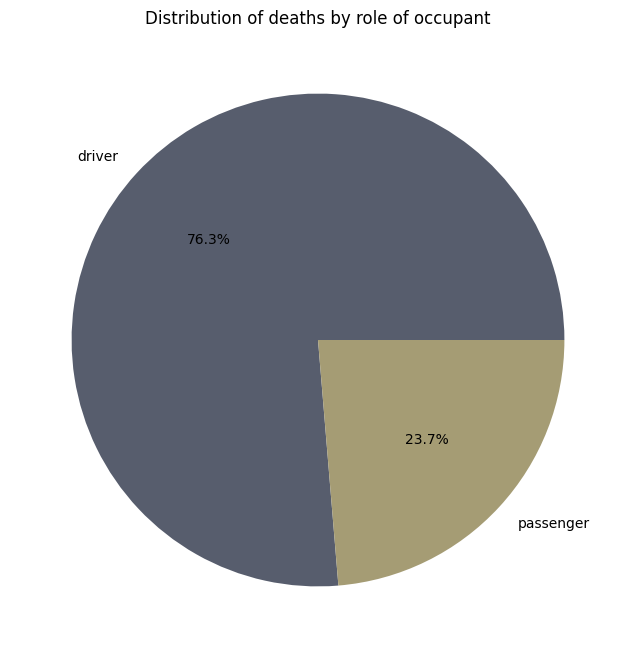

In [ ]:
# role of the occupant

df_train['occRole'].replace({0: 'passenger', 1: 'driver'}, inplace=True)
subset_data = df_train[df_train['dead'] == 0]

# Count the occurrences of each category
count_occRole = subset_data['occRole'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_occRole, labels=count_occRole.index, autopct='%1.1f%%', colors=sns.color_palette("cividis", len(count_occRole)))
plt.title('Distribution of deaths by role of occupant')
plt.show()


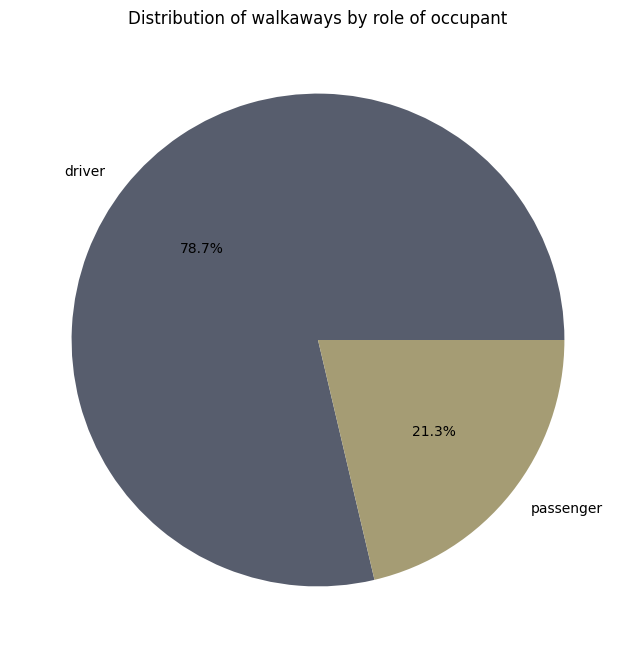

In [ ]:

subset_data = df_train[df_train['dead'] == 1]

# Count the occurrences of each category
count_occRole = subset_data['occRole'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_occRole, labels=count_occRole.index, autopct='%1.1f%%', colors=sns.color_palette("cividis", len(count_occRole)))
plt.title('Distribution of walkaways by role of occupant')
plt.show()

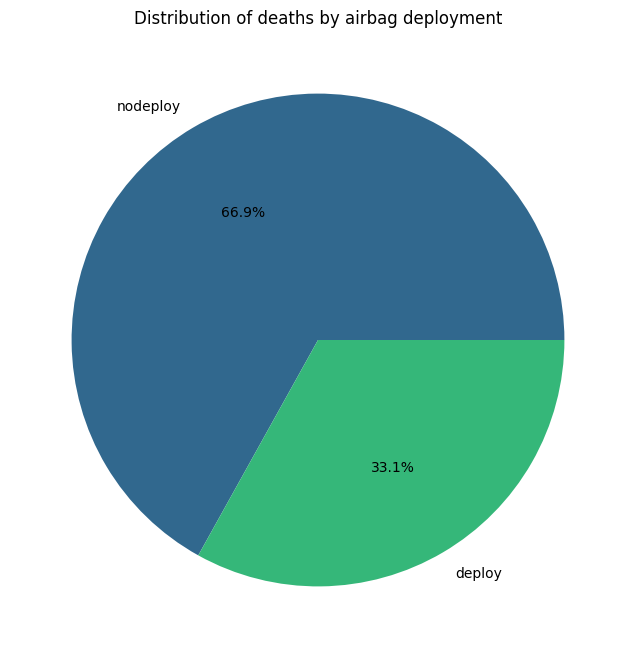

In [ ]:
#graph to see the relation between deaths and airbagdeploy
df_train['deploy'].replace({0: 'nodeploy', 1 :'deploy' }, inplace=True)
subset_data = df_train[df_train['dead'] == 0]

# Count the occurrences of each category
count_airbagdeploy = subset_data['deploy'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_airbagdeploy, labels=count_airbagdeploy.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(count_airbagdeploy)))
plt.title('Distribution of deaths by airbag deployment')
plt.show()


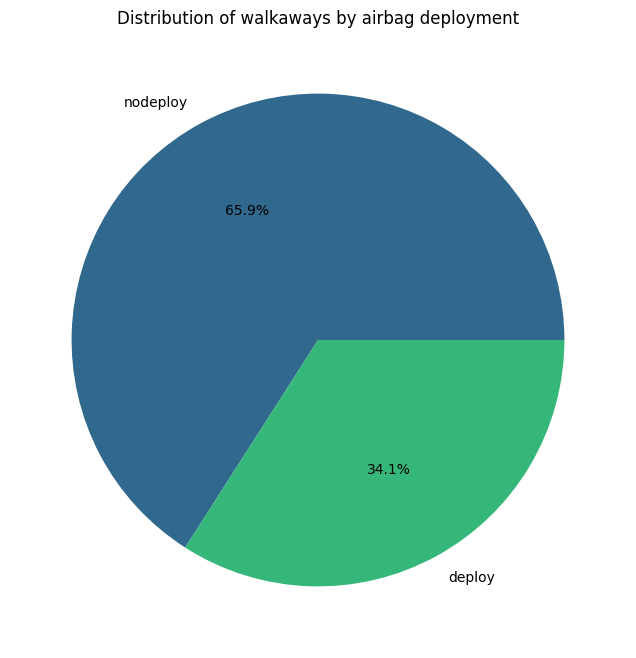

In [ ]:
subset_data = df_train[df_train['dead'] == 1]

# Count the occurrences of each category
count_airbagdeploy = subset_data['deploy'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_airbagdeploy, labels=count_airbagdeploy.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(count_airbagdeploy)))
plt.title('Distribution of walkaways by airbag deployment')
plt.show()

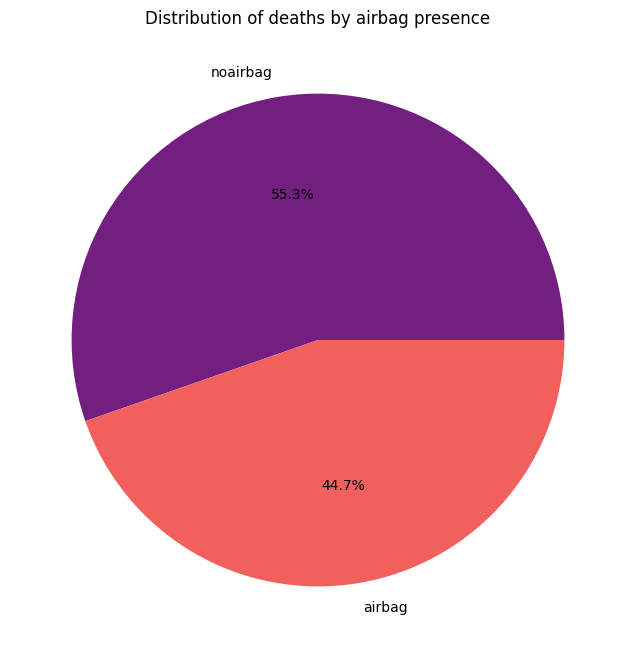

In [ ]:
#graph to see the relation between deaths and airbag pressence
df_train['airbag'].replace({0: 'noairbag', 1 :'airbag' }, inplace=True)
subset_data = df_train[df_train['dead'] == 0]

# Count the occurrences of each category
count_airbag = subset_data['airbag'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_airbag, labels=count_airbag.index, autopct='%1.1f%%', colors=sns.color_palette("magma", len(count_airbag)))
plt.title('Distribution of deaths by airbag presence')
plt.show()



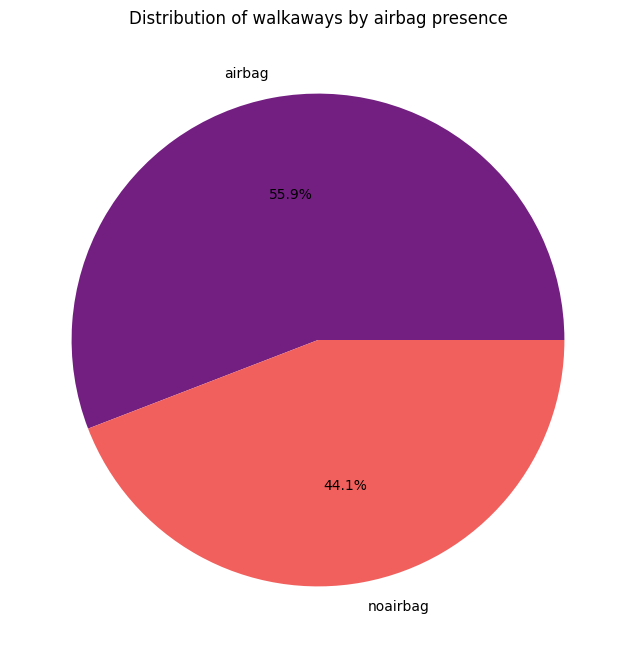

In [ ]:

subset_data = df_train[df_train['dead'] == 1]

# Count the occurrences of each category
count_airbag = subset_data['airbag'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_airbag, labels=count_airbag.index, autopct='%1.1f%%', colors=sns.color_palette("magma", len(count_airbag)))
plt.title('Distribution of walkaways by airbag presence')
plt.show()

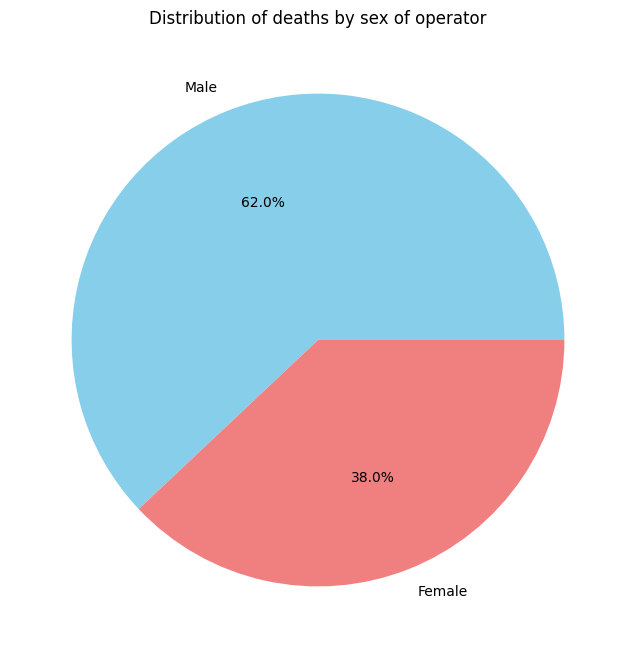

In [ ]:
#graph to see the relation between sex of driver and deaths
df_train['sex'].replace({0: 'Male', 1: 'Female'}, inplace=True)
subset_data = df_train[df_train['dead'] == 0]

# Count the occurrences of each sex
count_sex = subset_data['sex'].value_counts()

# Calculate the ratio
ratio_sex = count_sex / count_sex.sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ratio_sex, labels=ratio_sex.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of deaths by sex of operator')
plt.show()



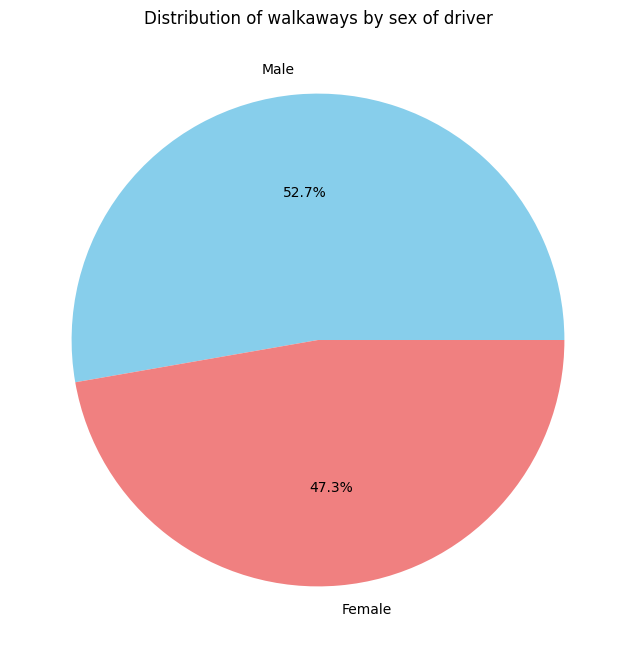

In [ ]:
df_train['sex'].replace({0: 'Male', 1: 'Female'}, inplace=True)
subset_data = df_train[df_train['dead'] == 1]

count_sex = subset_data['sex'].value_counts()

# Calculate the ratio
ratio_sex = count_sex / count_sex.sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ratio_sex, labels=ratio_sex.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of walkaways by sex of driver')
plt.show()

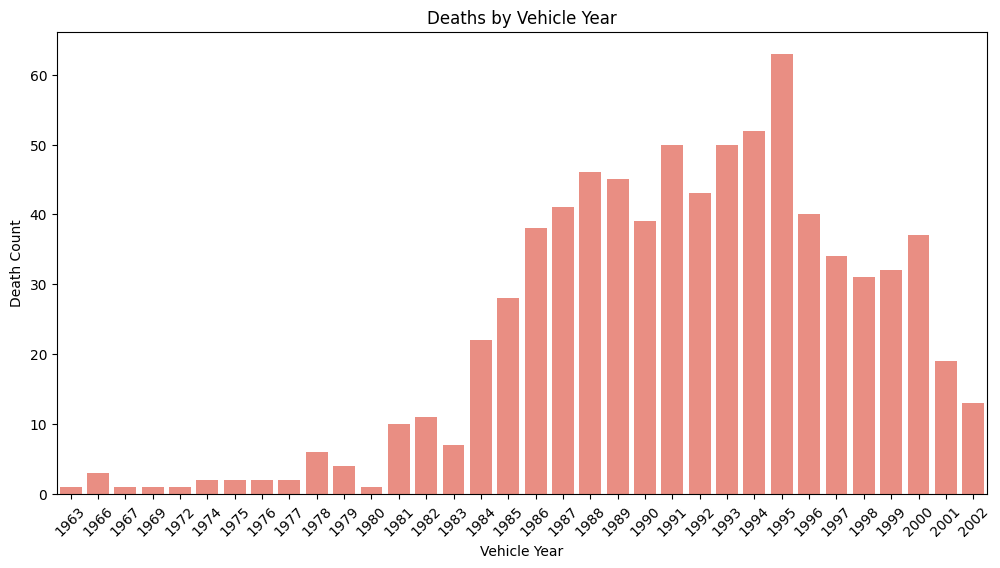

In [ ]:
#comparing deaths to vehicle year
subset_data = df_train[df_train['dead'] == 0]

# Count the occurrences of deaths for each unique 'yearVeh'
death_counts_by_year = subset_data['yearVeh'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=death_counts_by_year.index, y=death_counts_by_year.values, color='salmon')
plt.title('Deaths by Vehicle Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Death Count')
plt.xticks(rotation=45)
plt.show()

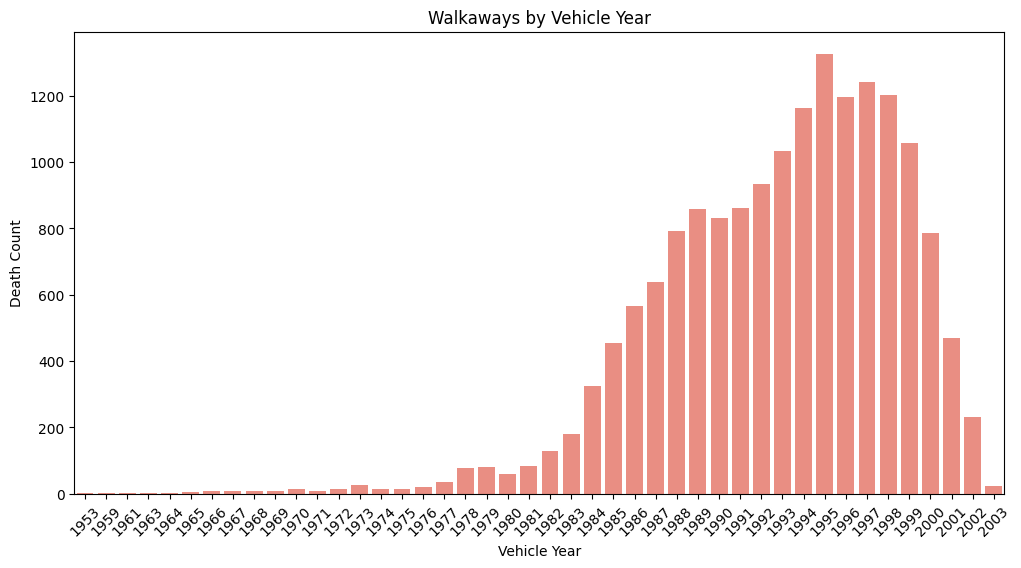

In [ ]:
#comparing non-lethal accidents to vehicle year
subset_data = df_train[df_train['dead'] == 1]

# Count the occurrences of deaths for each unique 'yearVeh'
death_counts_by_year = subset_data['yearVeh'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=death_counts_by_year.index, y=death_counts_by_year.values, color='salmon')
plt.title('Walkaways by Vehicle Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Death Count')
plt.xticks(rotation=45)
plt.show()

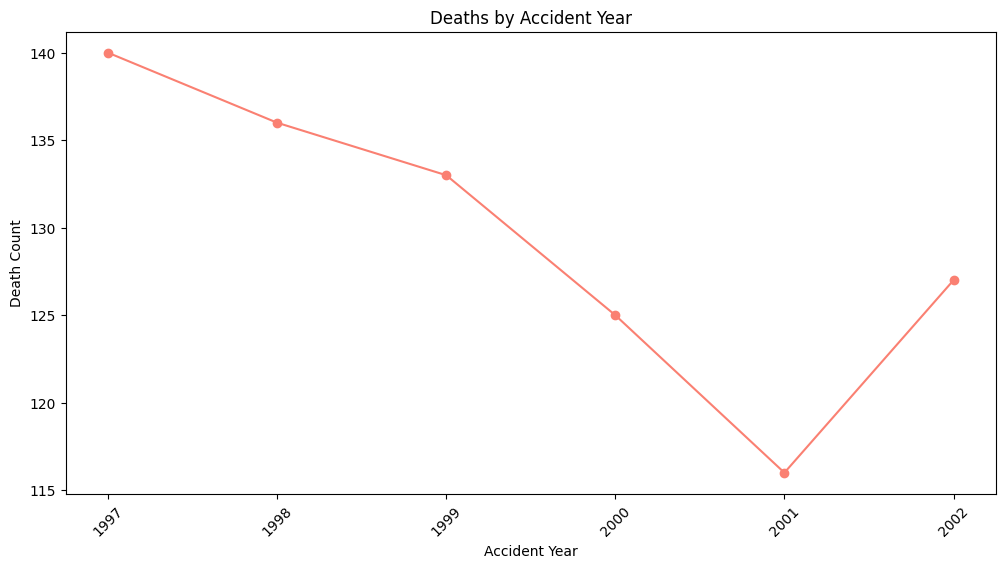

In [ ]:
#which year had more deaths overall
subset_data = df_train[df_train['dead'] == 0]

# Count the occurrences of deaths for each unique 'yearacc'
death_counts_by_yearacc = subset_data['yearacc'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(death_counts_by_yearacc.index, death_counts_by_yearacc.values, marker='o', color='salmon')
plt.title('Deaths by Accident Year')
plt.xlabel('Accident Year')
plt.ylabel('Death Count')
plt.xticks(rotation=45)
plt.show()





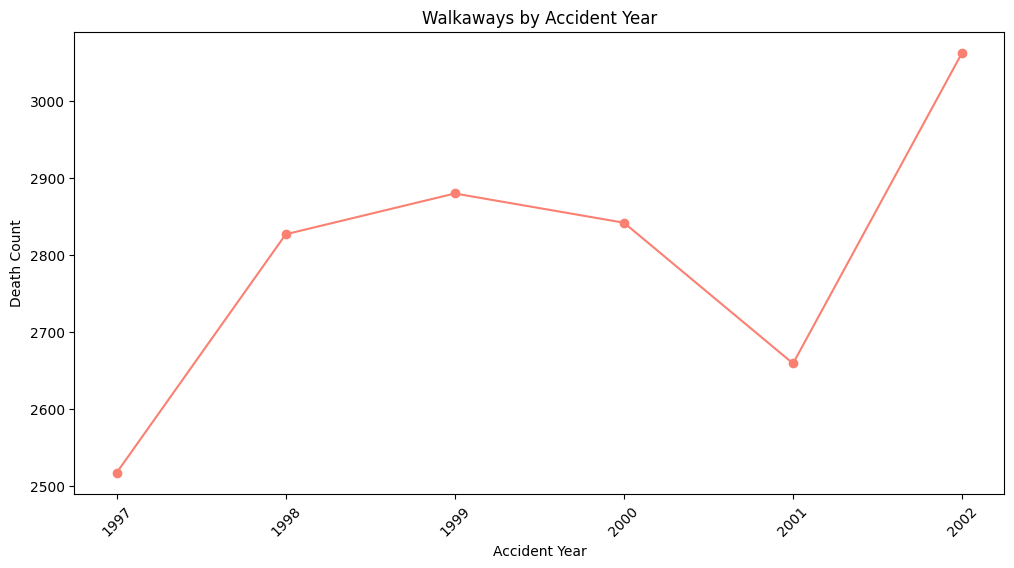

In [ ]:
#which year had less deaths overall
subset_data = df_train[df_train['dead'] == 1]

# Count the occurrences of deaths for each unique 'yearacc'
death_counts_by_yearacc = subset_data['yearacc'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.plot(death_counts_by_yearacc.index, death_counts_by_yearacc.values, marker='o', color='salmon')
plt.title('Walkaways by Accident Year')
plt.xlabel('Accident Year')
plt.ylabel('Death Count')
plt.xticks(rotation=45)
plt.show()


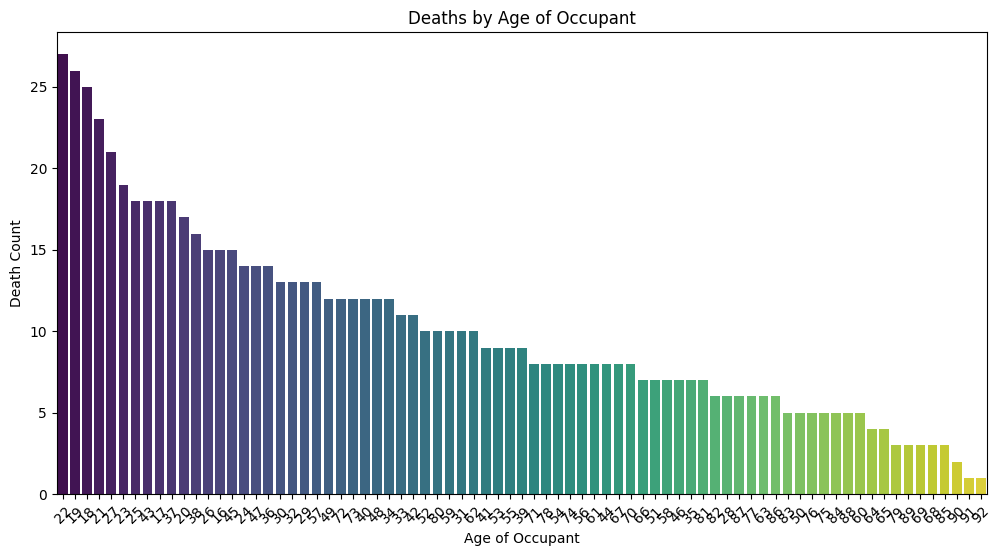

In [ ]:
#deaths compared to age of occupants
subset_data = df_train[df_train['dead'] == 0]

# Plot the count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='ageOFocc', data=subset_data, order=subset_data['ageOFocc'].value_counts().index, palette='viridis')
plt.title('Deaths by Age of Occupant')
plt.xlabel('Age of Occupant')
plt.ylabel('Death Count')
plt.xticks(rotation=45)
plt.show()

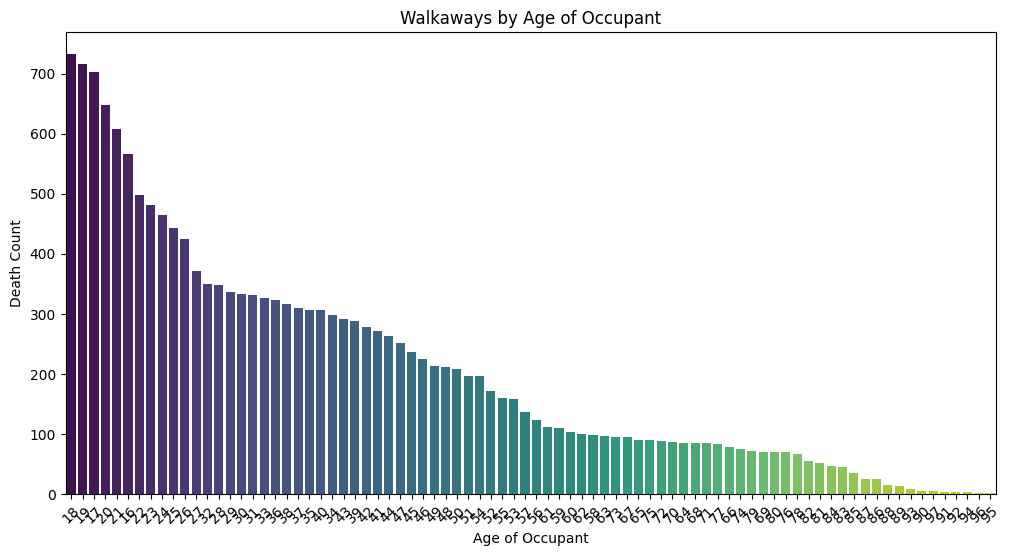

In [ ]:
#non-lethal accidents compared to age of occupants
subset_data = df_train[df_train['dead'] == 1]

# Plot the count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='ageOFocc', data=subset_data, order=subset_data['ageOFocc'].value_counts().index, palette='viridis')
plt.title('Walkaways by Age of Occupant')
plt.xlabel('Age of Occupant')
plt.ylabel('Death Count')
plt.xticks(rotation=45)
plt.show()

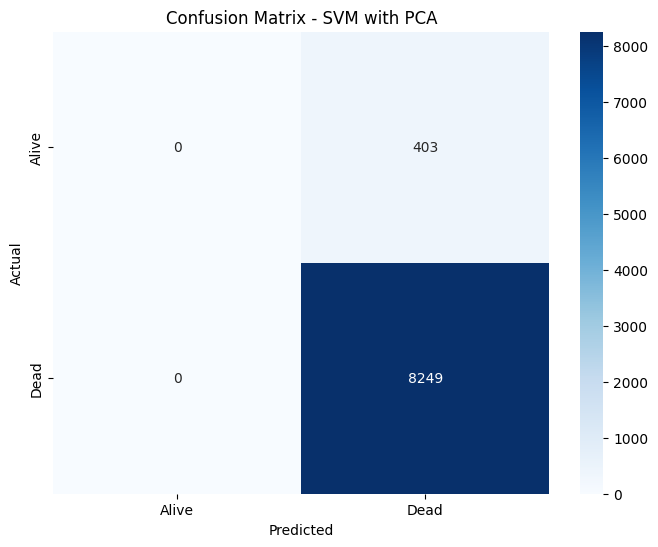

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm_svm = confusion_matrix(target_test, decisions_svm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.title('Confusion Matrix - SVM with PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

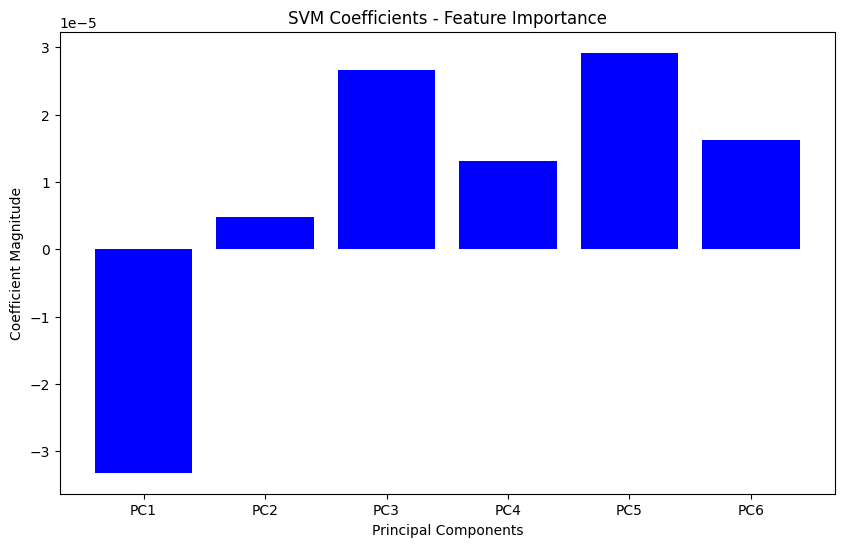

In [ ]:

# Retrieve the coefficients from the linear SVM model
coefficients = svm_classifier.coef_.ravel()

# Get the feature names from your PCA-transformed data
feature_names = [f'PC{i+1}' for i in range(len(coefficients))]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients, color='blue')
plt.title('SVM Coefficients - Feature Importance')
plt.xlabel('Principal Components')
plt.ylabel('Coefficient Magnitude')
plt.show()

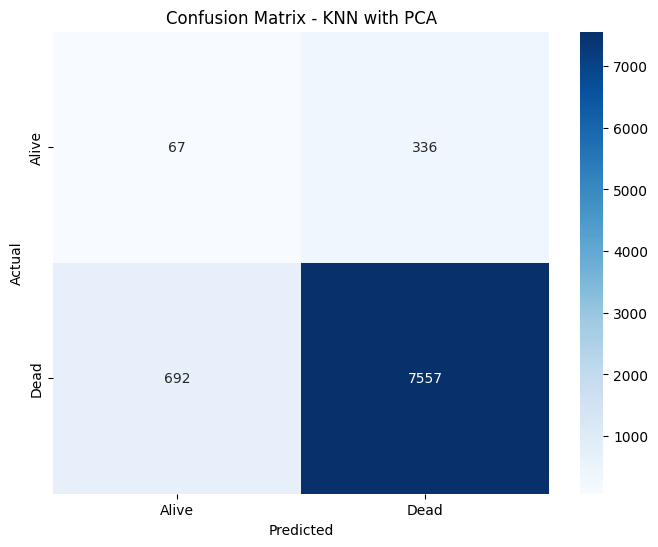

In [ ]:
# Compute confusion matrix
cm_knn = confusion_matrix(target_test, prediction_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.title('Confusion Matrix - KNN with PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc


# Evaluation metrics for KNN
accuracy_knn = accuracy_score(target_test, prediction_knn)
precision_knn = precision_score(target_test, prediction_knn)
recall_knn = recall_score(target_test, prediction_knn)
f1_knn = f1_score(target_test, prediction_knn)
cm_knn = confusion_matrix(target_test, prediction_knn)

# ROC Curve and AUC-ROC for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(target_test, knn.predict_proba(data_test_pca)[:, 1])
auc_roc_knn = roc_auc_score(target_test, knn.predict_proba(data_test_pca)[:, 1])

# Precision-Recall Curve and AUC-PR for KNN
precision_knn, recall_knn, _ = precision_recall_curve(target_test, knn.predict_proba(data_test_pca)[:, 1])
auc_pr_knn = auc(recall_knn, precision_knn)

# Evaluation metrics for SVM
accuracy_svm = accuracy_score(target_test, decisions_svm)
precision_svm = precision_score(target_test, decisions_svm)
recall_svm = recall_score(target_test, decisions_svm)
f1_svm = f1_score(target_test, decisions_svm)
cm_svm = confusion_matrix(target_test, decisions_svm)

# ROC Curve and AUC-ROC for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(target_test, svm_classifier.decision_function(data_test_pca))
auc_roc_svm = roc_auc_score(target_test, svm_classifier.decision_function(data_test_pca))

# Precision-Recall Curve and AUC-PR for SVM
precision_svm, recall_svm, _ = precision_recall_curve(target_test, svm_classifier.decision_function(data_test_pca))
auc_pr_svm = auc(recall_svm, precision_svm)


# Calculate precision explicitly
precision_knn = np.sum(cm_knn[1, 1]) / (np.sum(cm_knn[:, 1]) + np.finfo(float).eps)

# Calculate recall explicitly
recall_knn = np.sum(cm_knn[1, 1]) / (np.sum(cm_knn[1, :]) + np.finfo(float).eps)

# Displaying the results
print("KNN Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")  # Corrected this line
print(f"F1 Score: {f1_knn:.4f}")
print("Confusion Matrix:")
print(cm_knn)

print("\nKNN AUC-ROC:", auc_roc_knn)
print("KNN AUC-PR:", auc_pr_knn)

print("\n---\n")

# Calculate precision and recall explicitly for SVM
precision_svm = cm_svm[1, 1] / (cm_svm[1, 1] + cm_svm[0, 1] + np.finfo(float).eps)
recall_svm = cm_svm[1, 1] / (cm_svm[1, 1] + cm_svm[1, 0] + np.finfo(float).eps)

# Displaying the results
print("SVM Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print("Confusion Matrix:")
print(cm_svm)

print("\nSVM AUC-ROC:", auc_roc_svm)
print("SVM AUC-PR:", auc_pr_svm)




KNN Metrics:
Accuracy: 0.8812
Precision: 0.9574
Recall: 0.9161
F1 Score: 0.9363
Confusion Matrix:
[[  67  336]
 [ 692 7557]]

KNN AUC-ROC: 0.5411113821752062
KNN AUC-PR: 0.9767576685397066

---

SVM Metrics:
Accuracy: 0.9534
Precision: 0.9534
Recall: 1.0000
F1 Score: 0.9762
Confusion Matrix:
[[   0  403]
 [   0 8249]]

SVM AUC-ROC: 0.6518459113925231
SVM AUC-PR: 0.9732480763545002
